##  Analysis of real and model networks using NetworkX

#### Lecture on November 22, 2017

In [1]:
import networkx as nx

### Erdos-Renyi (ER) random graph model

In [2]:
RG = nx.Graph()

In [118]:
RG = nx.erdos_renyi_graph(1000,0.01)

In [119]:
2*len(RG.edges())/len(RG.nodes())

10.002

In [7]:
0.2*1000*999/2

99900.0

In [87]:
RG_deg_sequence = nx.degree(RG).values()

In [88]:
import matplotlib.pyplot as plt

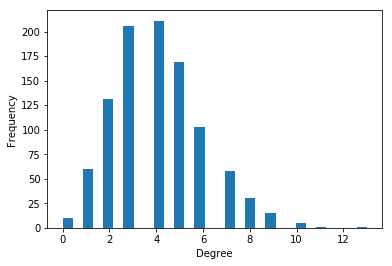

In [89]:
plt.hist(RG_deg_sequence,bins=30)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [90]:
plt.close()

In [121]:
nx.average_clustering(RG)

0.0113829143680537

In [127]:
nx.average_shortest_path_length(RG)

3.2586986986986988

## Watts-Strogatz (WS) Model - Small-world graphs

#### Regular graph from WS model

In [34]:
OPS = nx.Graph()

In [137]:
OPS = nx.watts_strogatz_graph(1000,10,0.2)

In [138]:
2*len(OPS.edges())/len(OPS.nodes())

10.0

In [141]:
OPS_deg_sequence = nx.degree(OPS).values()

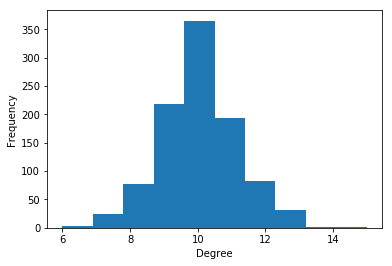

In [142]:
plt.hist(OPS_deg_sequence)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [139]:
nx.average_clustering(OPS)

0.3531160617160611

In [140]:
nx.average_shortest_path_length(OPS)

3.875993993993994

### Barabasi-Albert (BA) model

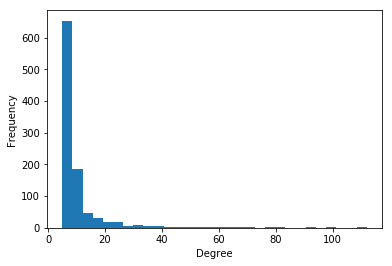

In [144]:
SN = nx.Graph()
SN = nx.barabasi_albert_graph(1000,5)
2*len(SN.edges())/len(SN.nodes())
SN_deg_sequence = nx.degree(SN).values()
plt.hist(SN_deg_sequence,bins=30)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [145]:
max(SN_deg_sequence)

112

In [146]:
max(OPS_deg_sequence)

15

In [147]:
max(RG_deg_sequence)

13

In [148]:
nx.average_clustering(SN)

0.03939236084259324

In [149]:
nx.average_shortest_path_length(SN)

2.9775895895895896

### Power-law cluster graph

In [152]:
MKS = nx.Graph()
MKS = nx.powerlaw_cluster_graph(1000,5,0.3)

In [153]:
2*len(MKS.edges())/len(MKS.nodes())

9.924

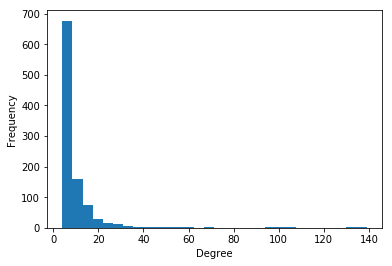

In [154]:
MKS_deg_sequence = nx.degree(MKS).values()
plt.hist(MKS_deg_sequence,bins=30)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [157]:
nx.average_clustering(MKS)

0.14182606830008967

In [158]:
nx.average_shortest_path_length(MKS)

2.9683903903903905

## Example of a real network
### Moreno Protein Interaction graph
#### http://konect.uni-koblenz.de/networks/moreno_propro

In [159]:
edge = []
for lin in open('moreno_protein.txt'):
    if lin[0] == '%':
        continue
    else:
        edge.append( tuple(lin.strip().split(' ')) )

In [161]:
morenoppi = nx.Graph()

In [162]:
morenoppi.add_edges_from(edge)

In [163]:
len(morenoppi.nodes())

1870

In [164]:
len(morenoppi.edges())

2277

In [165]:
nx.average_clustering(morenoppi)

0.06716802014455514

In [167]:
nx.number_connected_components(morenoppi)

173

In [172]:
LCC_morenoppi = max(nx.connected_component_subgraphs(morenoppi), key=len)

In [173]:
LCC_morenoppi

In [174]:
len(LCC_morenoppi.nodes())

1458

In [175]:
nx.average_shortest_path_length(LCC_morenoppi)

6.812366015065626

In [177]:
max(nx.degree(morenoppi).values())

56

In [179]:
nx.degree_assortativity_coefficient(LCC_morenoppi)

-0.20753775959545173

In [181]:
nx.diameter(LCC_morenoppi)

19